# 머신러닝06_ 사이킷런으로 수행하는 타이타닉 생존자 예측

In [ ]:
# https://www.kaggle.com/c/titanic/data

## 변수 별 정보

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_df=pd.read_csv('C:/Users/JiHaeAN\Desktop/빅데이터/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# 데이터 칼럼 타입 확인
titanic_df.info()

* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

### 결측치 파악

In [35]:
# 데이터 칼럼 타입 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


##  데이터 전처리 : 결측치 처리

### NULL 컬럼들에 대한 처리

- 사이킷 머신러닝 알고리즘은 Null 값을 허용하지 않으므로
- Null 값을 어떻게 처리할지 결정
- DataFrame()의 fillna() 메서드를 사용해서 
- Null 값을 평균 또는 고정 값으로 변경
- Age : 평균 나이로 변경
- 나머지 칼럼 : 'N'으로 변경

In [14]:
# 널 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean, inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

titanic_df.isnull.
# 모든 칼럼의 Numll 값을 합산해서 널 값이 없는지 확인

### 문자열 변수(피처) 빈도 분포 확인: value_counts()

In [16]:
print('Sex분포 : \n', titanic_df['Sex'].value_counts())
print('Cabin분포 : \n', titanic_df['Cabin'].value_counts())
print('Embarked분포 : \n', titanic_df['Embarked'].value_counts())

Sex분포 : 
 male      577
female    314
Name: Sex, dtype: int64
Cabin분포 : 
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
D                3
              ... 
A10              1
B50              1
C85              1
D47              1
C46              1
Name: Cabin, Length: 148, dtype: int64
Embarked분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


### 문자열 변수 Cabin값 변경

In [18]:
# 칼럼 값 중에서 첫번째 문자만 추출
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [19]:
# 케빈 값을 선실등급만으로 표기(선실 번호 제외)
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
# 선실등급 별 개수 확인
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## 성별에 따른 생존자수 분포(EDA)

머신러닝 알고리즘 적용해서 예측 수행 전에 데이터 탐색
- 어떤 유형의 승객이 생존 확률이 높았는지
- 성별이 생존 확률에 어떤 영향을 미쳤는지
- 성별에 따른 생존자 수 비교

In [24]:
# 성별 분포 확인
titanic_df.groupby('Sex')['Sex'].count()

# 생존 분포 확인
titanic_df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [25]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

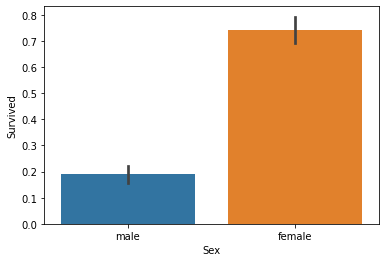

In [26]:
# 성별 생존자 : 막대 그래프
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

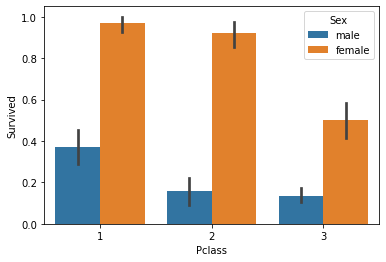

In [29]:
# 객실 등급별/성별 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)